In [1]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)
df = pd.read_csv("final_merged.csv")

In [ ]:
# Calculate mortality rate
df["Mortality Rate"] = df["Deaths"] / df["Population"]
df.sample(10)

,Buyer State,Buyer County,Total_MME,County,County Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Year,Population,Mortality Rate
10590,FL,BREVARD,3.192805e+04,"Brevard County, FL",12009,Drug poisonings (overdose) Unintentional (X40-...,D1,96,2014,555548,0.000173
24081,FL,POLK,4.167183e+05,"Polk County, FL",12105,Drug poisonings (overdose) Unintentional (X40-...,D1,91,2011,609948,0.000149
40206,NC,ALAMANCE,5.127266e+03,"Alamance County, NC",37001,Drug poisonings (overdose) Unintentional (X40-...,D1,15,2013,154162,0.000097
42668,NC,CARTERET,3.051432e+03,"Carteret County, NC",37031,Drug poisonings (overdose) Unintentional (X40-...,D1,15,2014,68629,0.000219
51000,SC,ANDERSON,1.636592e+05,"Anderson County, SC",45007,Drug poisonings (overdose) Unintentional (X40-...,D1,33,2010,187086,0.000176
22158,FL,PALM BEACH,2.578022e+05,"Palm Beach County, FL",12099,Drug poisonings (overdose) Unintentional (X40-...,D1,193,2010,1323619,0.000146
41691,NC,DURHAM,8.124197e+04,"Durham County, NC",37063,Drug poisonings (overdose) Unintentional (X40-...,D1,21,2006,246929,0.000085
21318,FL,MARION,1.030700e+04,"Marion County, FL",12083,Drug poisonings (overdose) Unintentional (X40-...,D1,45,2013,335083,0.000134
23804,FL,BROWARD,5.654126e+10,"Broward County, FL",12011,Drug poisonings (overdose) Unintentional (X40-...,D1,180,2014,1860933,0.000097
30057,GA,GWINNETT,4.532846e+05,"Gwinnett County, GA",13135,All other drug-induced causes,D9,11,2014,870986,0.000013


In [8]:
# Calculate mortality rate
mort_rate = df.groupby(["Buyer State", "Year"], as_index=False).agg(
    {"Deaths": "sum", "Population": "sum"}
)

# Calculate mortality rate
mort_rate["Mortality Rate"] = mort_rate["Deaths"] / mort_rate["Population"]

mort_rate.sample(10)

,Buyer State,Year,Deaths,Population,Mortality Rate
39,MT,2015,123,1099470,0.000112
69,SC,2015,4039,25222554,0.000160
33,MT,2009,175,1159560,0.000151
21,ID,2007,160,1876840,0.000085
37,MT,2013,260,2204020,0.000118
0,FL,2006,136958,1801392144,0.000076
23,ID,2009,340,3554970,0.000096
40,NC,2006,23905,234106025,0.000102
49,NC,2015,14265,105355935,0.000135
47,NC,2013,29712,282301257,0.000105


In [3]:
df["Drug/Alcohol Induced Cause"].value_counts()

Drug/Alcohol Induced Cause
Drug poisonings (overdose) Unintentional (X40-X44)    51836
All other drug-induced causes                          2753
Drug poisonings (overdose) Undetermined (Y10-Y14)      1276
Name: count, dtype: int64

In [4]:
# Filter for known opioid overdose deaths
od = df[
    df["Drug/Alcohol Induced Cause"]
    == "Drug poisonings (overdose) Unintentional (X40-X44)"
]

In [9]:
# Group by Buyer State and Year, summing Total_MME
states = od.groupby(["Buyer State", "Year"], as_index=False)["Total_MME"].sum()

states = states.merge(
    mort_rate,
    left_on=["Buyer State", "Year"],
    right_on=["Buyer State", "Year"],
    how="inner",
)

states.sample(10)

,Buyer State,Year,Total_MME,Deaths,Population,Mortality Rate
11,GA,2007,4.691931e+07,16983,198793896,0.000085
33,MT,2010,2.416446e+05,290,2578935,0.000112
76,WA,2014,1.459374e+07,19474,238927754,0.000082
39,NC,2007,4.763144e+07,22111,220645637,0.000100
72,WA,2010,2.745881e+07,31928,307556210,0.000104
15,GA,2011,1.181756e+11,23680,243767655,0.000097
48,OR,2006,5.453678e+06,3640,54701387,0.000067
44,NC,2012,7.538579e+07,29228,269449362,0.000108
34,MT,2012,2.765517e+05,180,1771370,0.000102
56,OR,2014,6.895506e+06,4446,64466142,0.000069


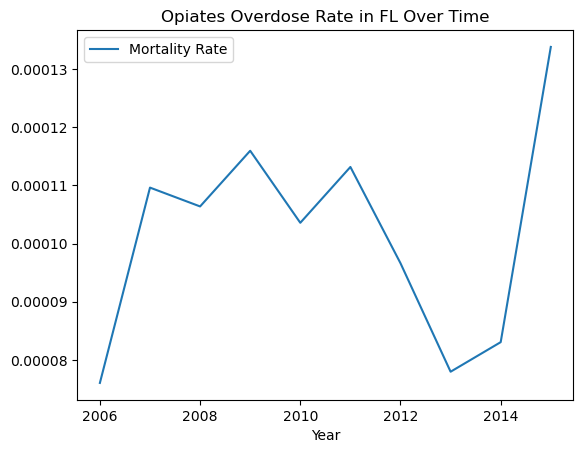

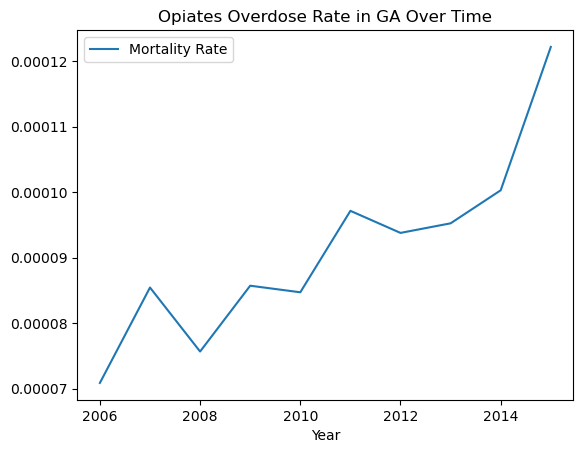

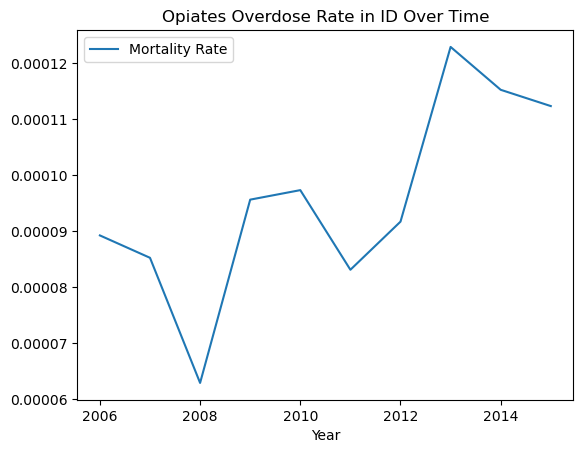

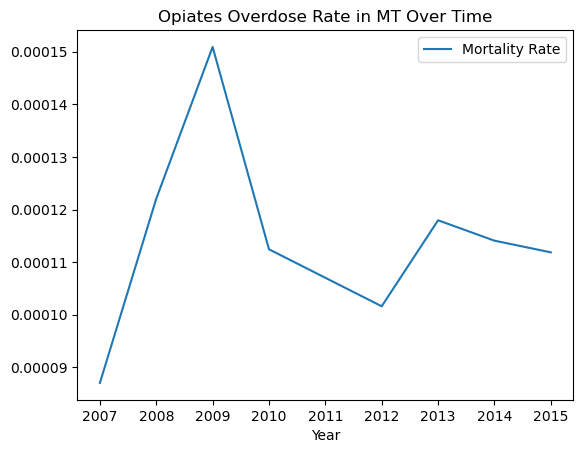

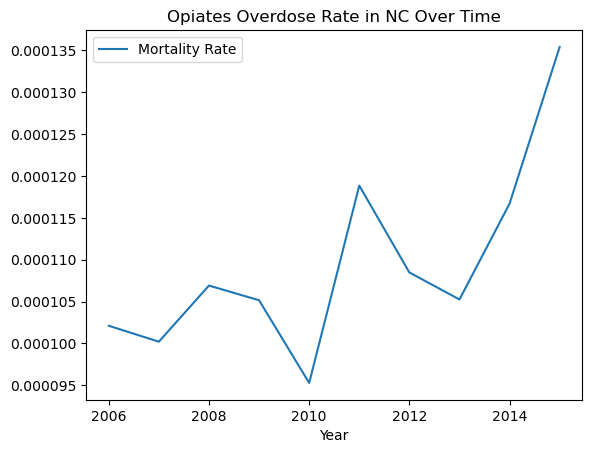

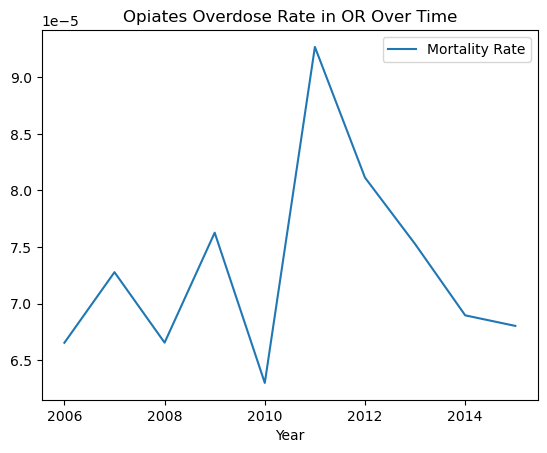

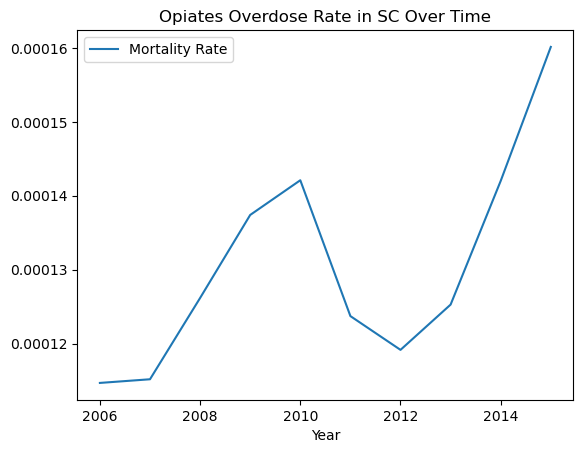

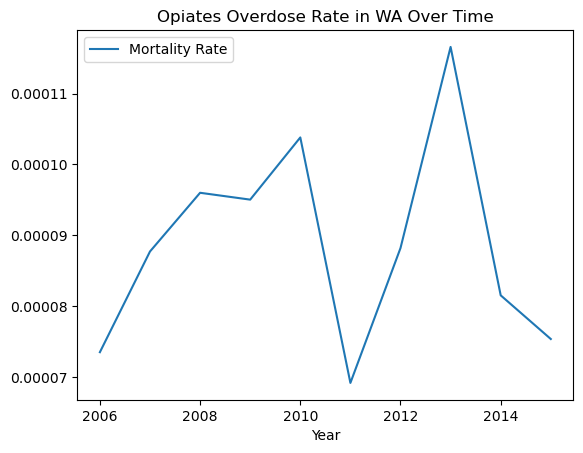

In [12]:
for i in states["Buyer State"].unique():
    state_data = states[states["Buyer State"] == i]
    state_data.plot(
        x="Year",
        y="Mortality Rate",
        title=f"Opiates Overdose Rate in {i} Over Time",
    )